In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [27]:
#bashCommand = "grep -Po '(?<=Batch )[0-9]+|(?<=seconds. Total training loss: )[0-9]+' data/execution log 2.txt > data/batch_training_loss.txt"

##Sometimes this code doesn't run well, so copy paste the bash command and run to generate the text file
bashCommand = "grep -Po '(?<=Batch )[0-9]+(?= done in )|(?<=seconds. Total training loss: )[0-9]+' data/execution\ log\ 2.txt > data/batch_training_loss.txt"
os.system(bashCommand)

1

In [28]:
batches,loss = [],[]

with open('data/batch_training_loss.txt','r') as f:
    lines = f.readlines()
    for c,line in enumerate(lines):
        if c%2 == 0:
            batches.append(float(line.strip()))
        else:
            loss.append(float(line.strip()))
batches = np.array(batches)
loss = np.array(loss)

In [60]:
indx_epoch = np.argwhere(np.diff(batches) < 0 ) + 1
indx_epoch = np.append( np.insert(indx_epoch,0,0),len(batches))

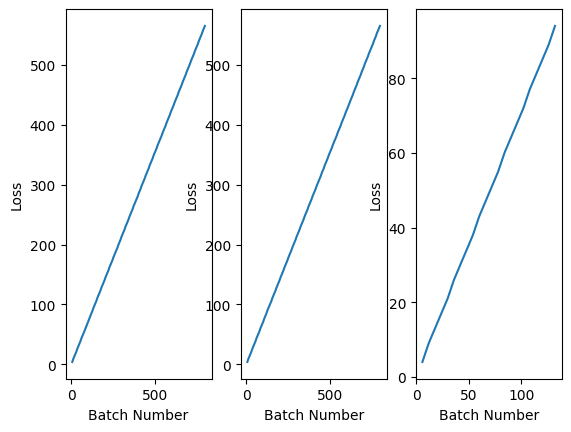

In [63]:
n_batches = len(indx_epoch)-1
for c,(i,j) in enumerate(zip(indx_epoch[:-1],indx_epoch[1:])):
    plt.subplot(1,n_batches,c+1)
    plt.plot(batches[i:j],loss[i:j])
    plt.xlabel('Batch Number') ; plt.ylabel('Loss')
    
plt.savefig('data/loss_per_batches.png')